<a href="https://colab.research.google.com/github/Sahil8383/BitCoin-Prediction-System/blob/master/BitCoinPricePredicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [ ]:
dataset=pd.read_csv('Bitcoin.csv')

In [ ]:
dataset

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.00,300.00,300.00,300.00,0.01000,3.000000,300.000000
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
828681,1470634080,594.36,594.36,593.86,593.86,15.38704,9140.228296,594.021221
828682,1470634140,594.04,594.05,594.04,594.05,0.16132,95.832033,594.049298
828683,1470634200,594.12,594.12,594.12,594.12,0.05231,31.078417,594.120000
828684,1470634260,594.05,594.05,594.05,594.05,0.07506,44.589393,594.050000


In [ ]:
dataset.isnull().sum()

Timestamp                0
Open                 90324
High                 90324
Low                  90324
Close                90324
Volume_(BTC)         90325
Volume_(Currency)    90325
Weighted_Price       90325
dtype: int64

In [ ]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.fillna(1, inplace=True)

In [ ]:
dataset.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [ ]:
dataset.isna().any()

Timestamp            False
Open                 False
High                 False
Low                  False
Close                False
Volume_(BTC)         False
Volume_(Currency)    False
Weighted_Price       False
dtype: bool

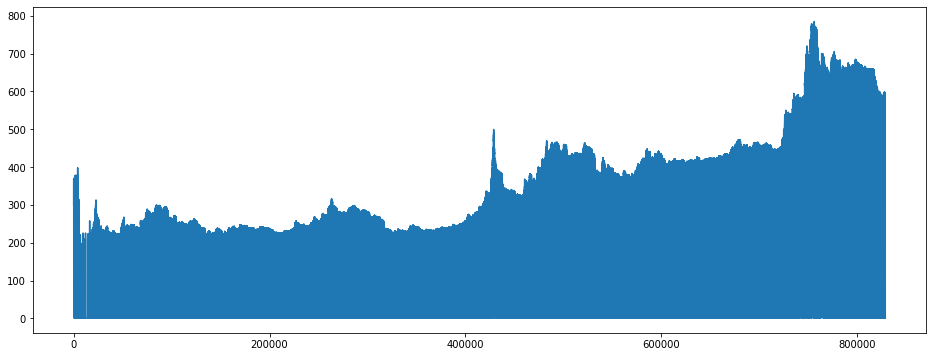

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
x = dataset[['Open','High','Low','Volume_(BTC)']]
y = dataset['Close']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [ ]:
x_train.shape

(580080, 4)

In [ ]:
x_test.shape

(248606, 4)

In [ ]:

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)



In [ ]:
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:

y_pred = regressor.predict(x_test)

[-0.59409388  0.82566768  0.7684231  -0.00122952]


0.027238307814513973


In [ ]:

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
805838,658.63,658.5237
73308,262.15,262.2256
495938,434.28,434.2336
458549,318.48,318.4809
422992,325.40,325.4749
...,...,...
807073,657.46,657.3834
528229,447.57,447.5701
164263,239.77,239.7702
25129,256.61,256.5359


In [ ]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07684187839394209
Mean Squared Error: 0.2819243027287767
Root Mean Squared Error: 0.5309654440062712


In [ ]:

errors = abs(y_pred - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


mape = 100 * (errors / y_test)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.08 degrees.
Accuracy: 99.98 %.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


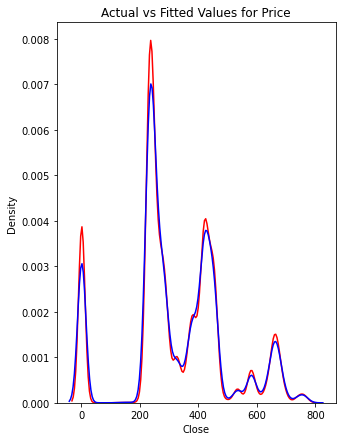

In [ ]:

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [ ]:
# dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})
import pydot

Tree = regressor.estimators_[5]

from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe6c095d7a0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fe6c0965290> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# print(dfr)

         Actual Price  Predicted Price
268153         287.67       287.695794
1300110       2473.90      2473.743508
1335096       2560.01      2562.248322
1715615       8161.01      8161.923226
213944         224.92       224.941824
...               ...              ...
824053         587.99       588.206389
2018995       6334.54      6334.537527
1047682        837.94       837.913000
1925194       6413.96      6413.964988
384946         240.15       240.174030

[524940 rows x 2 columns]


In [ ]:
# numpyArr = np.array([1,2,3,4])

In [ ]:
# from sklearn.metrics import confusion_matrix ,accuracy_score

In [ ]:
# regressor.score(x_test,y_test)

0.9999989697571795

In [ ]:
# import math

In [ ]:
# graph=dfr.head(25)

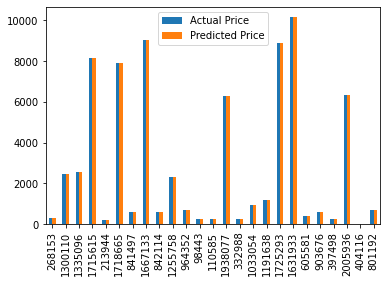

In [ ]:
# graph.plot(kind='bar')